In [1]:
from turbine.average_streamline.turbine import Turbine as TurbAvLine
from compressor.average_streamline.compressor import Compressor as CompAvLine
from gas_turbine_cycle.core.turbine_lib import Inlet, Outlet, Turbine, Compressor, CombustionChamber, Sink, Source
import numpy as np 
import config
import os
import pickle
from variable_modes.compressor_characteristics.storage import From16To18Pi
from variable_modes.schemes import TwoShaftGeneratorVar1

# Загрузка данных расчета номинального режима

In [2]:
with open(os.path.join(config.output_dirname, config.cycle_results), 'rb') as f:
    units = pickle.load(f)[0]
    
comp_turb_cycle: Turbine = units['comp_turbine']
power_turb_cycle: Turbine = units['power_turbine']
inlet: Inlet = units['inlet']
outlet: Outlet = units['outlet']
comb_chamber: CombustionChamber = units['comb_chamber']
sink: Sink = units['sink']
source: Source = units['source']

In [3]:
with open(os.path.join(config.output_dirname, 'comp_turbine_ave_line.avl'), 'rb') as f:
    comp_turb: TurbAvLine = pickle.load(f)['turbine']

with open(os.path.join(config.output_dirname, 'power_turbine_ave_line.avl'), 'rb') as f:
    power_turb: TurbAvLine = pickle.load(f)['turbine']

with open(os.path.join(config.output_dirname, 'compressor.comp'), 'rb') as f:
    compressor: CompAvLine = pickle.load(f)[0]

# Задание исходных данных

In [23]:
g_cool_st1 = comp_turb.first.G_cool / compressor.G
g_cool_st2 = comp_turb.last.G_cool / compressor.G
T_stag_in_arr=np.linspace(303, 243, 21)

plot_prefix = 'var_mode'

In [24]:
scheme = TwoShaftGeneratorVar1(
    inlet=inlet, compressor=compressor, comp_turbine=comp_turb, 
    power_turbine=power_turb, comb_chamber=comb_chamber, outlet=outlet,
    p_stag_in=inlet.p_stag_in, T_a=288, p_a=101325, g_cool_sum=sink.g_cooling + sink.g_outflow, 
    g_cool_st1=g_cool_st1, g_cool_st2=g_cool_st2, eta_r=power_turb_cycle.eta_r, 
    pi_c_stag_rel_init=0.95, n_norm_rel_init=0.95, 
    pi_t1_stag_init=1.75, pi_t2_stag_init=2.05, pi_t3_stag_init=3.8, comp_char=From16To18Pi(), 
    outlet_diff_coef=2, precision=0.0001,
    g_fuel_init=comb_chamber.g_fuel_prime * comb_chamber.g_in,
    T_stag_in_arr=T_stag_in_arr,
    N_e_max=16e6,
    T_g_stag=comb_chamber.T_stag_out
)

In [25]:
scheme.solve()

Residual computing.
pi_c_stag_rel = 0.950
n_norm_rel = 0.950
pi_t1_stag = 1.75
pi_t2_stag = 2.05
pi_t3_stag = 3.80
g_fuel = 0.0187
T_stag_in = 303.00

G_t1_res = -3.496
G_t2_res = -2.540
G_t3_res = -6.937
L_res = 1298027.634
p_out_res = 12296.076

Residual computing.
pi_c_stag_rel = 0.950
n_norm_rel = 0.950
pi_t1_stag = 1.75
pi_t2_stag = 2.05
pi_t3_stag = 3.80
g_fuel = 0.0187
T_stag_in = 303.00

G_t1_res = -3.496
G_t2_res = -2.540
G_t3_res = -6.937
L_res = 1298027.634
p_out_res = 12296.076

Residual computing.
pi_c_stag_rel = 0.950
n_norm_rel = 0.950
pi_t1_stag = 1.75
pi_t2_stag = 2.05
pi_t3_stag = 3.80
g_fuel = 0.0187
T_stag_in = 303.00

G_t1_res = -3.496
G_t2_res = -2.540
G_t3_res = -6.937
L_res = 1298027.634
p_out_res = 12296.076

Residual computing.
pi_c_stag_rel = 0.950
n_norm_rel = 0.950
pi_t1_stag = 1.75
pi_t2_stag = 2.05
pi_t3_stag = 3.80
g_fuel = 0.0187
T_stag_in = 303.00

G_t1_res = -3.496
G_t2_res = -2.540
G_t3_res = -6.937
L_res = 1298027.795
p_out_res = 12296.078

Residual

g_fuel = 0.0187
T_stag_in = 294.00

G_t1_res = 0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = -0.000
p_out_res = -0.000

Residual computing.
pi_c_stag_rel = 0.943
n_norm_rel = 0.978
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 3.88
g_fuel = 0.0187
T_stag_in = 291.00

G_t1_res = 0.130
G_t2_res = 0.144
G_t3_res = 0.147
L_res = -120592.359
p_out_res = -15.085

Residual computing.
pi_c_stag_rel = 0.943
n_norm_rel = 0.978
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 3.88
g_fuel = 0.0187
T_stag_in = 291.00

G_t1_res = 0.130
G_t2_res = 0.144
G_t3_res = 0.147
L_res = -120592.359
p_out_res = -15.085

Residual computing.
pi_c_stag_rel = 0.943
n_norm_rel = 0.978
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 3.88
g_fuel = 0.0187
T_stag_in = 291.00

G_t1_res = 0.130
G_t2_res = 0.144
G_t3_res = 0.147
L_res = -120592.359
p_out_res = -15.085

Residual computing.
pi_c_stag_rel = 0.943
n_norm_rel = 0.978
pi_t1_stag = 1.74
pi_t2_stag = 2.23
pi_t3_stag = 3.88
g_fuel = 0.0187
T_stag_in = 291.

n_norm_rel = 0.996
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.08
g_fuel = 0.0186
T_stag_in = 279.00

G_t1_res = 0.145
G_t2_res = 0.161
G_t3_res = 0.164
L_res = -133238.876
p_out_res = -17.470

Residual computing.
pi_c_stag_rel = 0.996
n_norm_rel = 0.996
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.08
g_fuel = 0.0186
T_stag_in = 279.00

G_t1_res = 0.145
G_t2_res = 0.161
G_t3_res = 0.164
L_res = -133239.024
p_out_res = -17.469

Residual computing.
pi_c_stag_rel = 1.012
n_norm_rel = 1.002
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.14
g_fuel = 0.0186
T_stag_in = 279.00

G_t1_res = -0.068
G_t2_res = -0.074
G_t3_res = -0.075
L_res = 10012.148
p_out_res = 5.277

Residual computing.
pi_c_stag_rel = 1.011
n_norm_rel = 1.002
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.13
g_fuel = 0.0186
T_stag_in = 279.00

G_t1_res = -0.006
G_t2_res = -0.007
G_t3_res = -0.007
L_res = 670.017
p_out_res = 0.965

Residual computing.
pi_c_stag_rel = 1.011
n_norm_rel = 1.002
pi_t1_stag = 

pi_c_stag_rel = 0.999
n_norm_rel = 0.997
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.09
g_fuel = 0.0184
T_stag_in = 276.00

G_t1_res = 0.147
G_t2_res = 0.163
G_t3_res = 0.167
L_res = -134552.219
p_out_res = -17.746

N_e_res = -17.746

Residual computing.
pi_c_stag_rel = 1.002
n_norm_rel = 0.998
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.10
g_fuel = 0.0182
T_stag_in = 276.00

G_t1_res = -0.001
G_t2_res = -0.001
G_t3_res = -0.001
L_res = 279.225
p_out_res = -0.085

N_e_res = -0.085

Residual computing.
pi_c_stag_rel = 1.002
n_norm_rel = 0.998
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.10
g_fuel = 0.0182
T_stag_in = 276.00

G_t1_res = 0.000
G_t2_res = 0.000
G_t3_res = 0.000
L_res = -0.769
p_out_res = 0.001

N_e_res = 0.001

Residual computing.
pi_c_stag_rel = 1.002
n_norm_rel = 0.998
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.10
g_fuel = 0.0182
T_stag_in = 276.00

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = 0.000
L_res = 0.006
p_out_res = -0.000

N_e_res 

pi_t2_stag = 2.24
pi_t3_stag = 4.12
g_fuel = 0.0179
T_stag_in = 267.00

G_t1_res = 0.155
G_t2_res = 0.173
G_t3_res = 0.176
L_res = -139439.008
p_out_res = -18.582

Residual computing.
pi_c_stag_rel = 1.009
n_norm_rel = 1.001
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.12
g_fuel = 0.0179
T_stag_in = 267.00

G_t1_res = 0.155
G_t2_res = 0.173
G_t3_res = 0.176
L_res = -139439.015
p_out_res = -18.582

Residual computing.
pi_c_stag_rel = 1.009
n_norm_rel = 1.001
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.12
g_fuel = 0.0179
T_stag_in = 267.00

G_t1_res = 0.155
G_t2_res = 0.173
G_t3_res = 0.176
L_res = -139438.827
p_out_res = -18.582

Residual computing.
pi_c_stag_rel = 1.009
n_norm_rel = 1.001
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.12
g_fuel = 0.0179
T_stag_in = 267.00

G_t1_res = 0.155
G_t2_res = 0.173
G_t3_res = 0.176
L_res = -139438.977
p_out_res = -18.581

Residual computing.
pi_c_stag_rel = 1.022
n_norm_rel = 1.007
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag

L_res = 0.662
p_out_res = -0.002

N_e_res = -0.002

Residual computing.
pi_c_stag_rel = 1.019
n_norm_rel = 1.006
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.16
g_fuel = 0.0173
T_stag_in = 261.00

G_t1_res = 0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = -0.020
p_out_res = 0.000

N_e_res = 0.000

Residual computing.
pi_c_stag_rel = 1.019
n_norm_rel = 1.006
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.16
g_fuel = 0.0173
T_stag_in = 261.00

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = -0.000
p_out_res = -0.000

N_e_res = -0.000

Residual computing.
pi_c_stag_rel = 1.019
n_norm_rel = 1.006
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.16
g_fuel = 0.0173
T_stag_in = 258.00

G_t1_res = 0.164
G_t2_res = 0.183
G_t3_res = 0.186
L_res = -143465.004
p_out_res = -19.553

Residual computing.
pi_c_stag_rel = 1.019
n_norm_rel = 1.006
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.16
g_fuel = 0.0173
T_stag_in = 258.00

G_t1_res = 0.164
G_t2_res = 0.183
G_t3_re

n_norm_rel = 1.008
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.17
g_fuel = 0.0171
T_stag_in = 255.00

G_t1_res = 0.167
G_t2_res = 0.186
G_t3_res = 0.190
L_res = -145365.722
p_out_res = -19.877

N_e_res = -19.877

Residual computing.
pi_c_stag_rel = 1.023
n_norm_rel = 1.008
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.17
g_fuel = 0.0171
T_stag_in = 255.00

G_t1_res = 0.167
G_t2_res = 0.186
G_t3_res = 0.190
L_res = -145365.702
p_out_res = -19.879

N_e_res = -19.879

Residual computing.
pi_c_stag_rel = 1.023
n_norm_rel = 1.008
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.17
g_fuel = 0.0171
T_stag_in = 255.00

G_t1_res = 0.167
G_t2_res = 0.186
G_t3_res = 0.190
L_res = -145366.014
p_out_res = -19.880

N_e_res = -19.880

Residual computing.
pi_c_stag_rel = 1.023
n_norm_rel = 1.008
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.17
g_fuel = 0.0171
T_stag_in = 255.00

G_t1_res = 0.167
G_t2_res = 0.186
G_t3_res = 0.190
L_res = -145366.022
p_out_res = -19.880

N_e_res = -19

n_norm_rel = 1.013
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.21
g_fuel = 0.0166
T_stag_in = 246.00

G_t1_res = 0.177
G_t2_res = 0.197
G_t3_res = 0.201
L_res = -150755.385
p_out_res = -20.953

Residual computing.
pi_c_stag_rel = 1.047
n_norm_rel = 1.019
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.26
g_fuel = 0.0166
T_stag_in = 246.00

G_t1_res = 0.001
G_t2_res = 0.001
G_t3_res = 0.001
L_res = 1425.848
p_out_res = -2.185

Residual computing.
pi_c_stag_rel = 1.047
n_norm_rel = 1.019
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.26
g_fuel = 0.0166
T_stag_in = 246.00

G_t1_res = -0.000
G_t2_res = -0.000
G_t3_res = -0.000
L_res = -25.827
p_out_res = 0.012

Residual computing.
pi_c_stag_rel = 1.047
n_norm_rel = 1.019
pi_t1_stag = 1.74
pi_t2_stag = 2.24
pi_t3_stag = 4.26
g_fuel = 0.0166
T_stag_in = 246.00

G_t1_res = -0.000
G_t2_res = 0.000
G_t3_res = -0.000
L_res = -0.028
p_out_res = -0.000

Residual computing.
pi_c_stag_rel = 1.047
n_norm_rel = 1.019
pi_t1_stag = 1.74
pi

# Результаты

## График изменения мощности

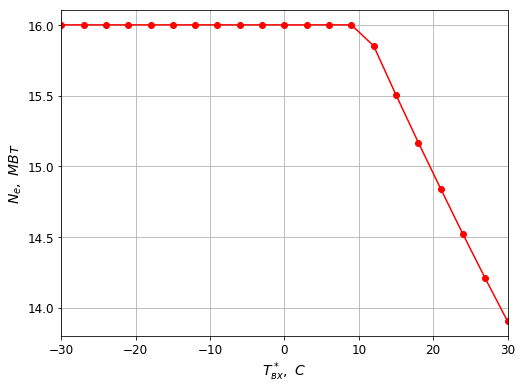

In [26]:
scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['N_e'] / 1e6, 
                            value_label=r'$N_e,\ МВт$', figsize=(8, 6), label_font=14, ticks_font=12, labels=True,
                            fname=os.path.join(config.plots_dir, '%s_N_e' % plot_prefix)
                        )

## График изменения эффективного КПД

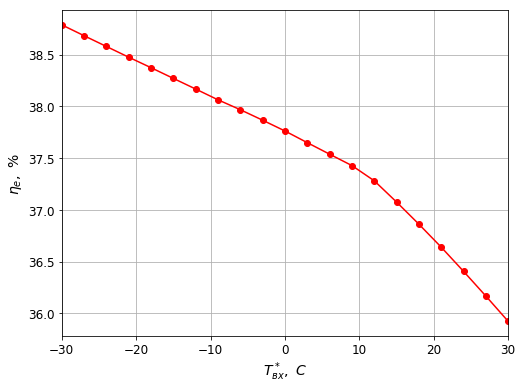

In [27]:
scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['eta_e'] * 100, 
                            value_label=r'$\eta_e,\ \%$', figsize=(8, 6), label_font=14, ticks_font=12, labels=True,
                            fname=os.path.join(config.plots_dir, '%s_eta_e' % plot_prefix)
                        )

## График изменения расхода уходящих газов

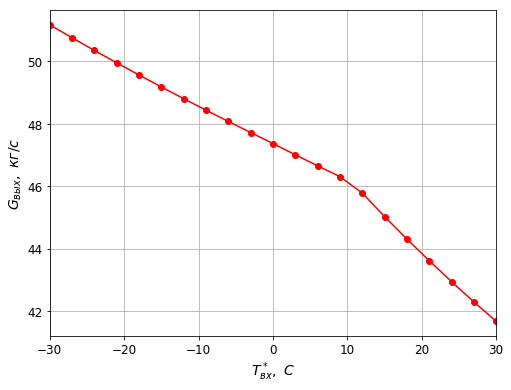

In [28]:
scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['G_out'], 
                            value_label=r'$G_{вых},\ кг/с$', figsize=(8, 6), label_font=14, ticks_font=12, labels=True,
                            fname=os.path.join(config.plots_dir, '%s_G_out' % plot_prefix)
                        )

## График изменения температуры уходящих газов

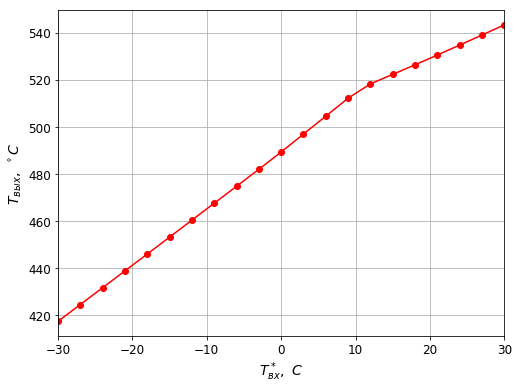

In [29]:
scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['T_out'] - 273, 
                            value_label=r'$T_{вых},\ ^\circ C$', figsize=(8, 6), label_font=14, ticks_font=12, labels=True,
                            fname=os.path.join(config.plots_dir, '%s_T_out' % plot_prefix)
                        )

## График изменения частоты вращения турбокомпрессора

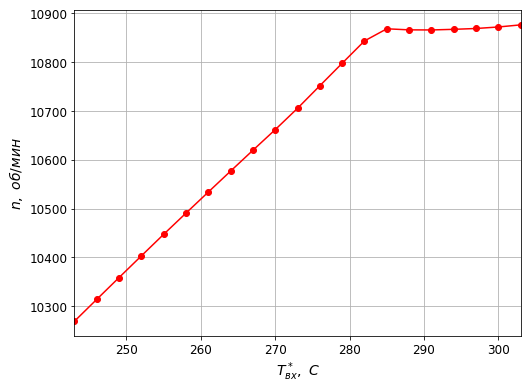

In [30]:
scheme.plot_inlet_temp_plot(T_stag_in_arr, value_arr=scheme.modes_params['n'], 
                            value_label=r'$n,\ об/мин$', figsize=(8, 6), label_font=14, ticks_font=12, labels=True,
                            fname=os.path.join(config.plots_dir, '%s_n' % plot_prefix))

## График зависимости КПД от мощности

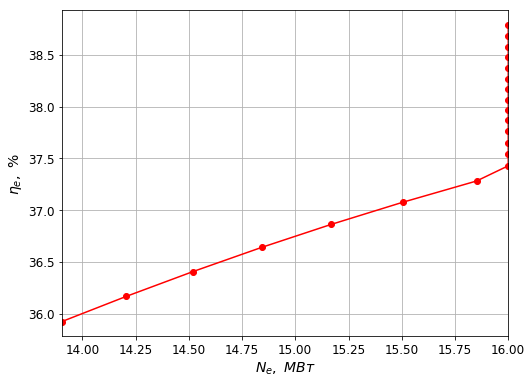

In [31]:
scheme.plot(value_x_arr=scheme.modes_params['N_e']/1e6, value_y_arr=scheme.modes_params['eta_e'] * 100, 
            xlabel=r'$N_e,\ МВт$', ylabel=r'$\eta_e,\ \%$', figsize=(8, 6), 
            label_font=14, ticks_font=12, labels=True,
            fname=os.path.join(config.plots_dir, '%s_eta_e_N_e' % plot_prefix))

## Линия режимов на характеристике компрессора

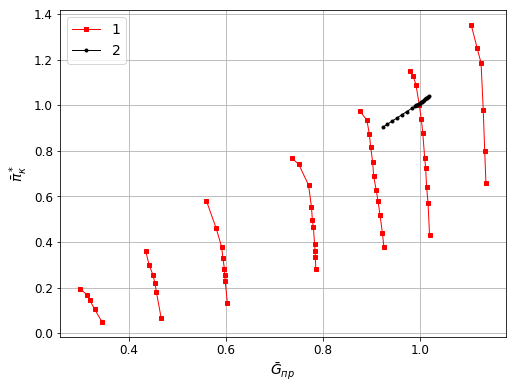

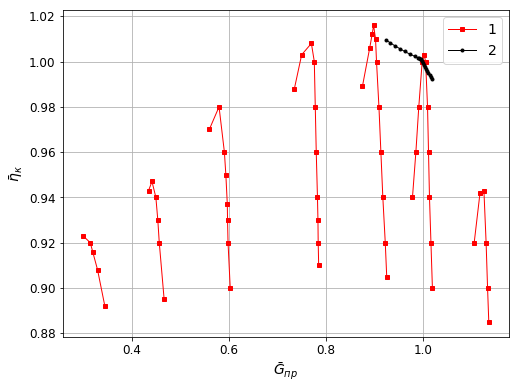

In [32]:
scheme.comp_model.characteristics.plot_modes_line(
    pi_c_stag_rel_arr=scheme.modes_params['pi_c_stag_rel'], 
    G_norm_rel_arr=scheme.modes_params['G_in_norm_rel'], 
    eta_c_stag_rel_arr=scheme.modes_params['eta_c_stag_rel'], figsize=(8, 6), 
    label_font=14, ticks_font=12, labels=True, legend_font=14,
    fname_base=os.path.join(config.plots_dir, '%s_mode_line' % plot_prefix)
)

## Таблица параметров 

In [33]:
modes_params = scheme.modes_params.copy().sort_values('T_stag_in')
modes_params['C_e'] = scheme.modes_params['C_e'] * 100
modes_params['N_e'] = scheme.modes_params['N_e'] / 1e6
params_round = modes_params.round({
    'pi_c_stag_rel': 3,
    'n_norm_rel': 3,
    'pi_t1_stag': 2,
    'pi_t2_stag': 2,
    'pi_t3_stag': 2,
    'T_stag_in': 1,
    'T_g_stag': 1,
    'g_fuel': 4,
    'G_fuel': 3,
    'N_e': 2,
    'C_e': 4,
    'eta_e': 3,
    'G_in_norm_rel': 3,
    'eta_c_stag_rel': 3,
    'G_c': 2,
    'eta_c_stag': 3,
    'pi_c_stag': 2,
    'n': 1,
    'G_out': 2,
    'T_out': 1
})
params_round

,C_e,G_c,G_fuel,G_in_norm_rel,G_out,N_e,T_g_stag,T_out,T_stag_in,eta_c_stag,eta_c_stag_rel,eta_e,g_fuel,n,n_norm_rel,pi_c_stag,pi_c_stag_rel,pi_t1_stag,pi_t2_stag,pi_t3_stag
20,0.0192,52.49,0.852,1.017,51.17,16.00,1355.4,690.4,243.0,0.821,0.992,0.388,0.0162,10268.7,1.016,17.70,1.041,1.74,2.24,3.89
19,0.0192,52.06,0.854,1.015,50.76,16.00,1367.7,697.6,246.0,0.822,0.993,0.387,0.0164,10313.7,1.014,17.64,1.037,1.74,2.24,3.89
18,0.0193,51.63,0.857,1.013,50.35,16.00,1380.1,704.7,249.0,0.823,0.994,0.386,0.0166,10358.4,1.013,17.58,1.033,1.74,2.24,3.89
17,0.0193,51.22,0.859,1.011,49.95,16.00,1392.4,711.9,252.0,0.823,0.995,0.385,0.0168,10402.9,1.011,17.52,1.030,1.74,2.24,3.89
16,0.0194,50.81,0.861,1.009,49.57,16.00,1404.8,719.0,255.0,0.824,0.996,0.384,0.0170,10447.1,1.009,17.46,1.026,1.74,2.24,3.89
15,0.0194,50.41,0.864,1.007,49.18,16.00,1416.8,726.2,258.0,0.825,0.997,0.383,0.0171,10490.6,1.008,17.40,1.023,1.74,2.24,3.89
14,0.0195,50.01,0.866,1.005,48.81,16.00,1428.7,733.4,261.0,0.826,0.998,0.382,0.0173,10533.7,1.006,17.34,1.019,1.74,2.24,3.89
13,0.0195,49.63,0.868,1.003,48.44,16.00,1440.6,740.6,264.0,0.826,0.999,0.381,0.0175,10576.8,1.004,17.28,1.016,1.74,2.24,3.89
12,0.0196,49.25,0.870,1.001,48.08,16.00,1452.4,747.8,267.0,0.827,0.999,0.380,0.0177,10619.5,1.003,17.22,1.012,1.74,2.24,3.89
11,0.0196,48.87,0.873,0.999,47.72,16.00,1464.3,755.0,270.0,0.828,1.000,0.379,0.0179,10661.7,1.001,17.16,1.009,1.74,2.24,3.89


# Сохранение таблицы

In [34]:
params_round.to_csv(path_or_buf=os.path.join(config.output_dirname, 'var_mode_params1.csv'), 
                    columns=['T_stag_in', 'C_e', 'G_c', 'G_fuel', 'G_in_norm_rel', 'G_out', 'N_e', 'T_g_stag'])

params_round.to_csv(path_or_buf=os.path.join(config.output_dirname, 'var_mode_params2.csv'), 
                    columns=['T_stag_in', 'T_out', 'T_stag_in', 'eta_c_stag', 'eta_c_stag_rel', 'eta_e', 'g_fuel', 'n'])

params_round.to_csv(path_or_buf=os.path.join(config.output_dirname, 'var_mode_params3.csv'), 
                    columns=['T_stag_in', 'n_norm_rel', 'pi_c_stag', 'pi_c_stag_rel', 'pi_t1_stag', 'pi_t2_stag', 'pi_t3_stag'])

In [35]:
params_round.to_excel(excel_writer=os.path.join(config.output_dirname, 'var_mode_params.xlsx'),
                     columns=[
                        'T_stag_in', 'C_e', 'G_c', 'G_fuel', 'G_in_norm_rel', 'G_out', 'N_e', 'T_g_stag',
                        'T_out', 'eta_c_stag', 'eta_c_stag_rel', 'eta_e', 'g_fuel',
                        'n', 'n_norm_rel', 'pi_c_stag', 'pi_c_stag_rel', 'pi_t1_stag',
                        'pi_t2_stag', 'pi_t3_stag'
                     ]
                )

# Графики для чертежа

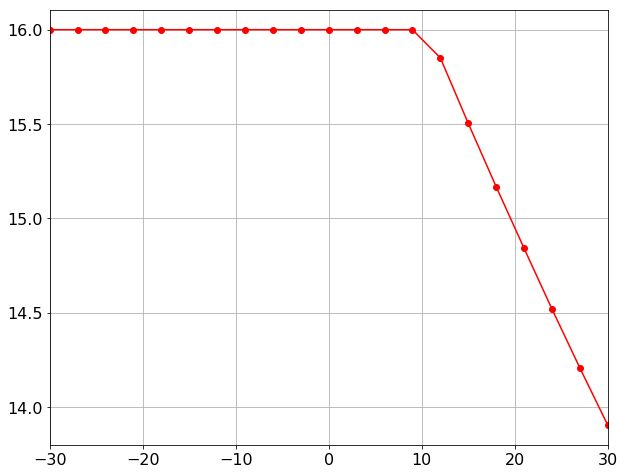

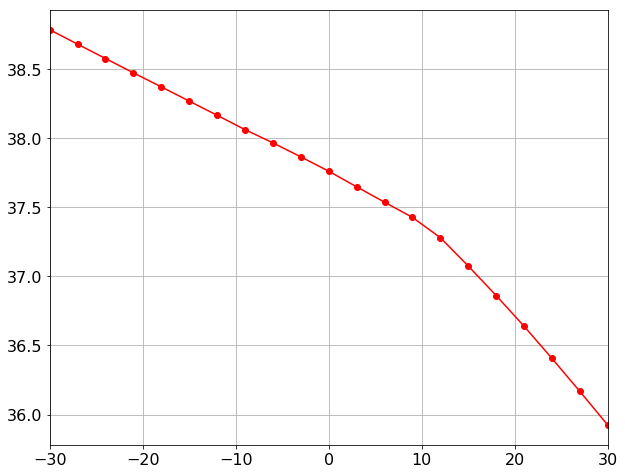

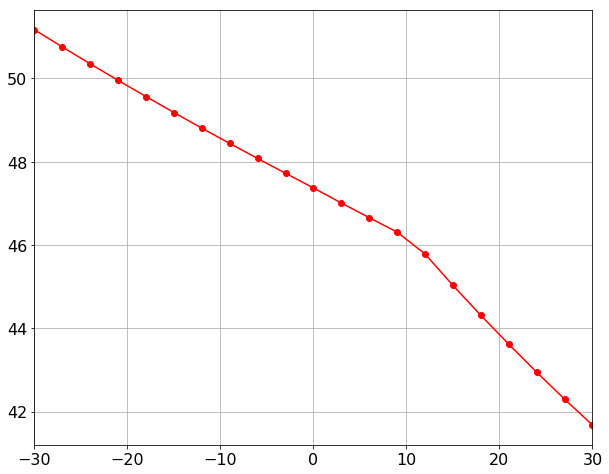

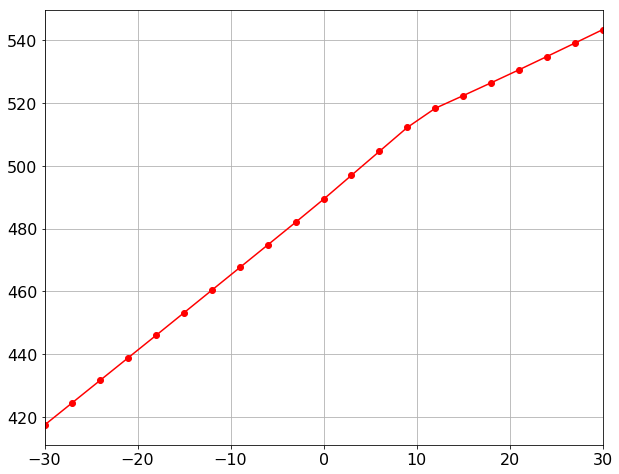

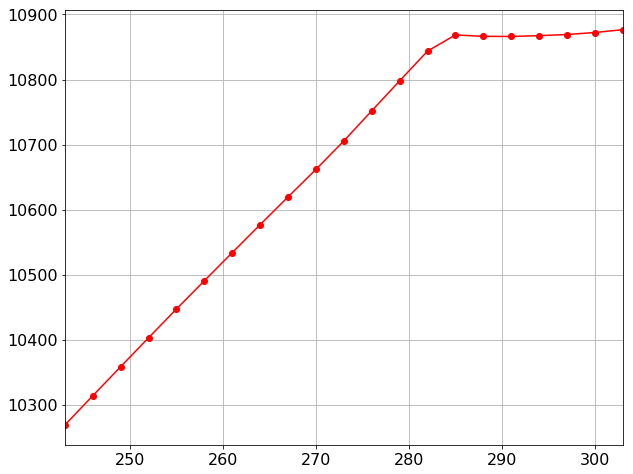

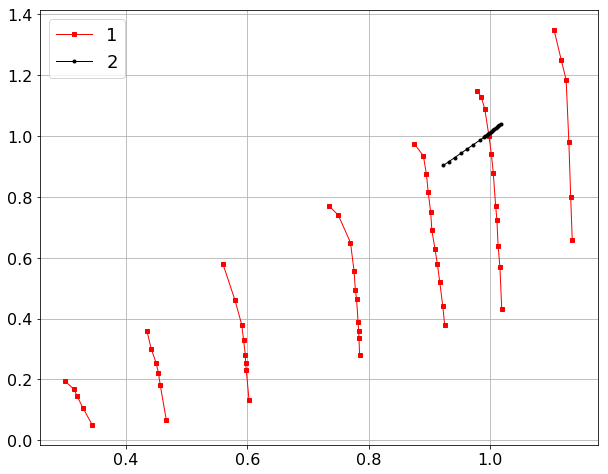

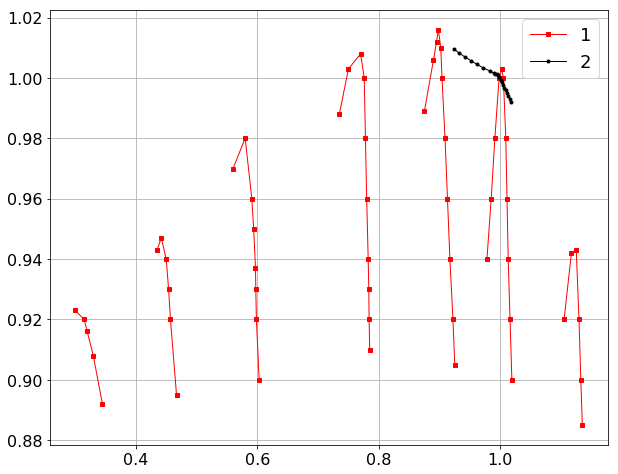

In [36]:
scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['N_e'] / 1e6, 
                            value_label=r'$N_e,\ МВт$', figsize=(10, 8), label_font=14, ticks_font=16, labels=False,
                            fname=os.path.join(config.draw_plots_dir, '%s_N_e' % plot_prefix)
                        )

scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['eta_e'] * 100, 
                            value_label=r'$\eta_e,\ \%$', figsize=(10, 8), label_font=14, ticks_font=16, labels=False,
                            fname=os.path.join(config.draw_plots_dir, '%s_eta_e' % plot_prefix)
                        )

scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['G_out'], 
                            value_label=r'$G_{вых},\ кг/с$', figsize=(10, 8), label_font=14, ticks_font=16, labels=False,
                            fname=os.path.join(config.draw_plots_dir, '%s_G_out' % plot_prefix)
                        )

scheme.plot_inlet_temp_plot(T_stag_in_arr-273, value_arr=scheme.modes_params['T_out'] - 273, 
                            value_label=r'$T_{вых},\ ^\circ C$', figsize=(10, 8), label_font=14, ticks_font=16, labels=False,
                            fname=os.path.join(config.plots_dir, '%s_T_out' % plot_prefix)
                        )

scheme.plot_inlet_temp_plot(T_stag_in_arr, value_arr=scheme.modes_params['n'], 
                            value_label=r'$n,\ об/мин$', figsize=(10, 8), label_font=14, ticks_font=16, labels=False,
                            fname=os.path.join(config.draw_plots_dir, '%s_n' % plot_prefix))

scheme.comp_model.characteristics.plot_modes_line(
    pi_c_stag_rel_arr=scheme.modes_params['pi_c_stag_rel'], 
    G_norm_rel_arr=scheme.modes_params['G_in_norm_rel'], 
    eta_c_stag_rel_arr=scheme.modes_params['eta_c_stag_rel'], figsize=(10, 8), 
    label_font=14, ticks_font=16, legend_font=18, labels=False,
    fname_base=os.path.join(config.draw_plots_dir, '%s_mode_line' % plot_prefix)
)